In [38]:
import base64
import struct
import matplotlib.pyplot as plt
import pandas as pd
f = open("hrmlog_text.txt")
lines = f.readlines()
hrmraw = lines[2]

data = base64.b64decode(hrmraw.split(":")[1])
data = list(struct.iter_unpack(">Ihhhh",data))
df = pd.DataFrame(data,columns=["time","ppg","x","y","z"])

<Axes: >

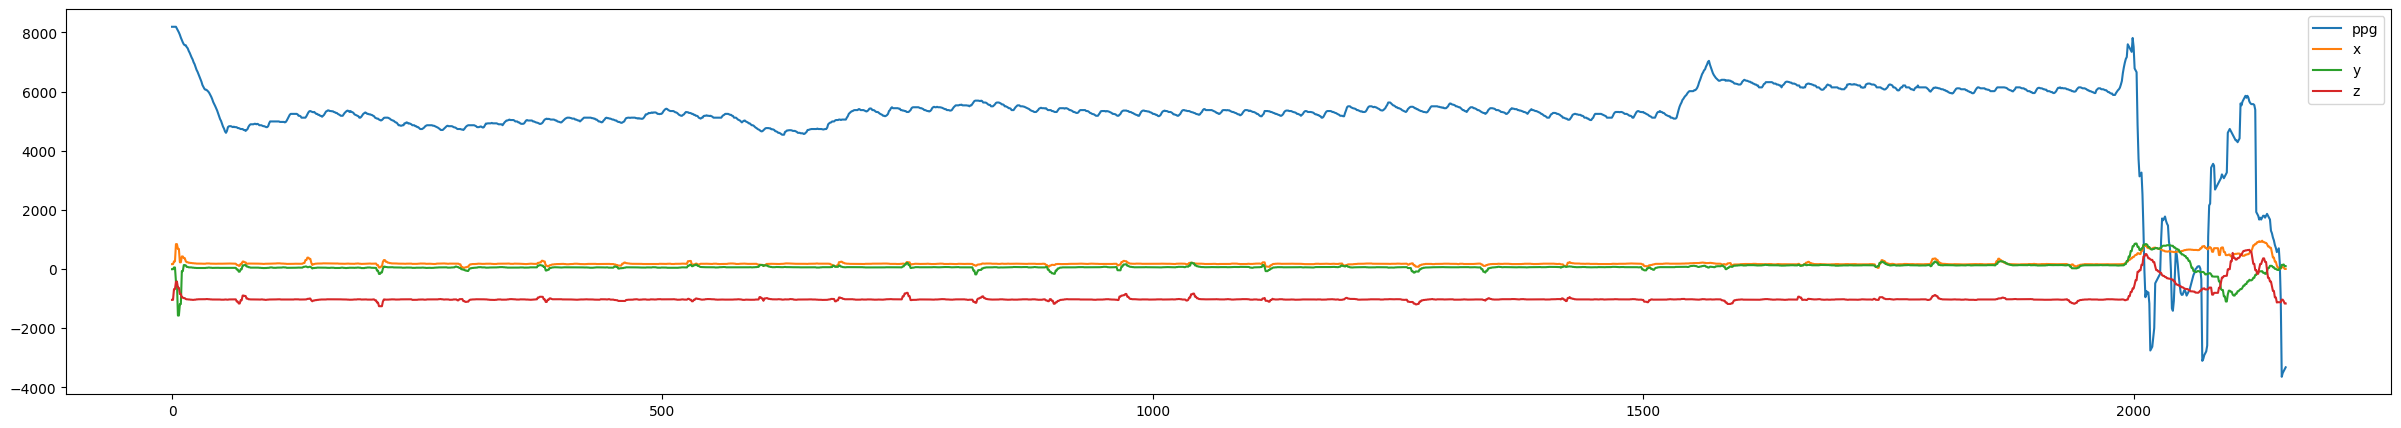

In [39]:
df[["ppg","x","y","z"]].plot(figsize=(30,5))

(1693311150,)